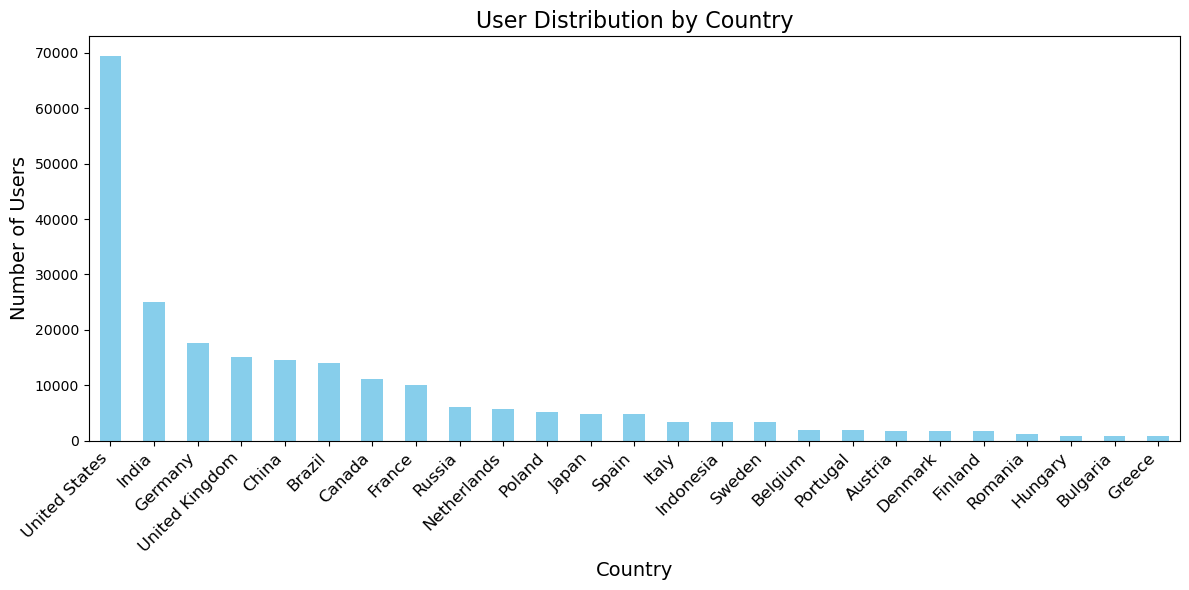

In [1]:
import pandas as pd  
import glob  

# 假设所有 CSV 文件在当前目录的 csv 文件夹中  
path =  r"C:\Users\86178\Desktop\导论数据\*.csv"  # 替换为你的 CSV 文件路径  
all_files = glob.glob(path)  

# 使用列表推导式读取所有文件并合并为一个 DataFrame  
dataframes = [pd.read_csv(file) for file in all_files]  
data = pd.concat(dataframes, ignore_index=True)  

# 检查合并后的数据  
#print(data.head())

import matplotlib.pyplot as plt  

# 国家分布统计  
country_distribution = data['country'].value_counts()  

# 选择前 N 个国家进行可视化，避免标签重叠（如前 10 个）  
top_n = 25
country_distribution = country_distribution.head(top_n)  

# 可视化  
plt.figure(figsize=(12, 6))  # 增大图形尺寸  
country_distribution.plot(kind='bar', color='skyblue')  # 设置柱子颜色  
plt.title('User Distribution by Country', fontsize=16)  # 增加标题字体  
plt.xlabel('Country', fontsize=14)  # 增加 X 轴标签字体  
plt.ylabel('Number of Users', fontsize=14)  # 增加 Y 轴标签字体  
plt.xticks(rotation=45, ha='right', fontsize=12)  # 旋转标签并设定位置为右侧  
plt.tight_layout()  # 自动调整布局  
plt.show()


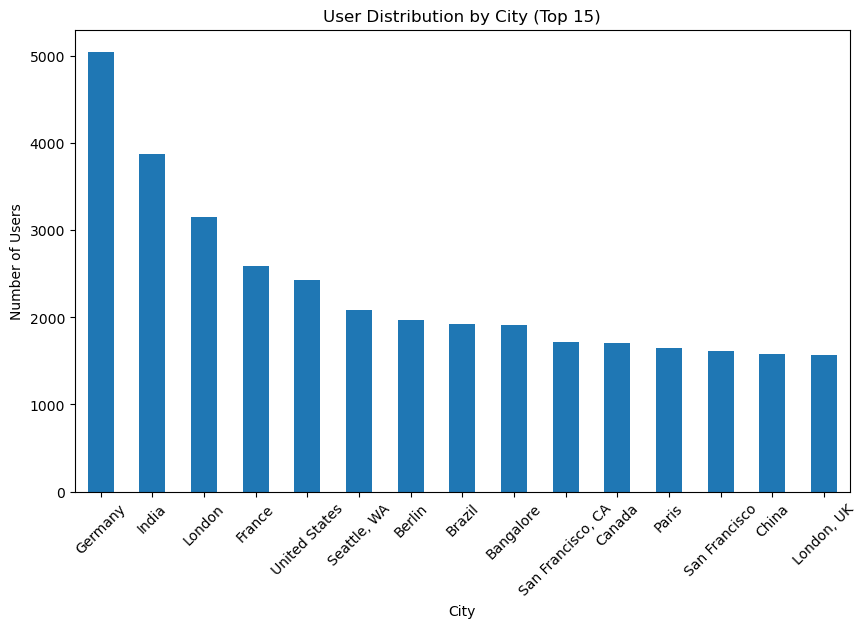

In [2]:
# 城市分布统计  
city_distribution = data['user_location'].value_counts()  

# 可视化  
plt.figure(figsize=(10, 6))  
city_distribution.head(15).plot(kind='bar')  # 只选取前十五个城市  
plt.title('User Distribution by City (Top 15)')  
plt.xlabel('City')  
plt.ylabel('Number of Users')  
plt.xticks(rotation=45)  
plt.show()

In [3]:
import pytz  

data['updated_at'] = pd.to_datetime(data['updated_at'])  

# 提取用户位置和时区  
# 这里假设 location_info_location 列包含城市或地区信息  
def get_timezone(location):  
    try:  
        # 使用pytz库获取时区  
        timezone = pytz.timezone(location)  
        return timezone.zone  
    except Exception:  
        return None  

# 创建一个新的列来存储时区信息  
data['timezone'] = data['location_info_location'].apply(get_timezone)  

# 统计每个时区的用户数量  
timezone_distribution = data['timezone'].value_counts()  
print(timezone_distribution.head(10))

timezone
Japan                1422
Poland               1383
Portugal              599
Asia/Tokyo              7
Asia/Shanghai           4
America/New_York        3
Europe/Berlin           2
Europe/Brussels         1
America/Vancouver       1
Eire                    1
Name: count, dtype: int64


In [4]:
# 统计每个用户的提交次数  
submission_counts = data['email'].value_counts()  

# 将结果转换为 DataFrame，方便后续使用或可视化  
submission_counts_df = submission_counts.reset_index()  
submission_counts_df.columns = ['email', 'submission_count']  # 重命名列  

# 查看提交次数最多的用户  
top_users = submission_counts_df.nlargest(10, 'submission_count')  # 提交次数最多的前 10 用户  
print("Top 10 Users by Submission Count:\n", top_users)  

# 查看提交次数最少的用户  
bottom_users = submission_counts_df.nsmallest(10, 'submission_count')  # 提交次数最少的前 10 用户  
print("\nBottom 10 Users by Submission Count:\n", bottom_users)  


Top 10 Users by Submission Count:
                         email  submission_count
0      tingyan.shen@gmail.com                 2
1         github@nunogois.com                 2
2                 yane@88.com                 2
3  josem.perram@educa.jcyl.es                 2
4    napoli.tiago96@gmail.com                 2
5               fembina@pm.me                 2
6           duritia@yahoo.com                 2
7        igoel.mail@gmail.com                 2
8        kazenasser@gmail.com                 2
9   jlynch@raiderexpress.tech                 2

Bottom 10 Users by Submission Count:
                          email  submission_count
15           levai@vivaldi.net                 1
16            gcrevell@mtu.edu                 1
17          joona.ramo@tuni.fi                 1
18       portillaj85@yahoo.com                 1
19      yangshuo3@kingsoft.com                 1
20        awanhari52@gmail.com                 1
21   flaviomarques85@gmail.com                 1
22  da

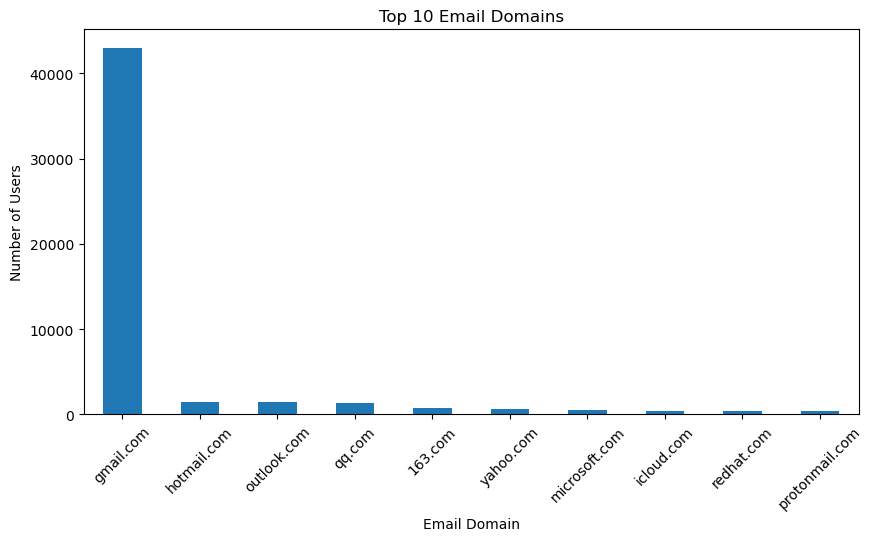

In [5]:
# 从邮件地址提取域名  
data['email_domain'] = data['email'].str.split('@').str[1]  
domain_distribution = data['email_domain'].value_counts()  

# 可视化  
plt.figure(figsize=(10, 5))  
domain_distribution.head(10).plot(kind='bar')  
plt.title('Top 10 Email Domains')  
plt.xlabel('Email Domain')  
plt.ylabel('Number of Users')  
plt.xticks(rotation=45)  
plt.show()

             country              company  user_count
73968  United States            Microsoft        1060
71237  United States               Google         687
76457  United States              Red Hat         340
66512  United States               Amazon         174
66530  United States  Amazon Web Services         169
63311  United States              @google         168
71920  United States                  IBM         167
60850  United States           @Microsoft         164
66111  United States                  AWS         148
12970          China            Microsoft         135


<Figure size 1000x800 with 0 Axes>

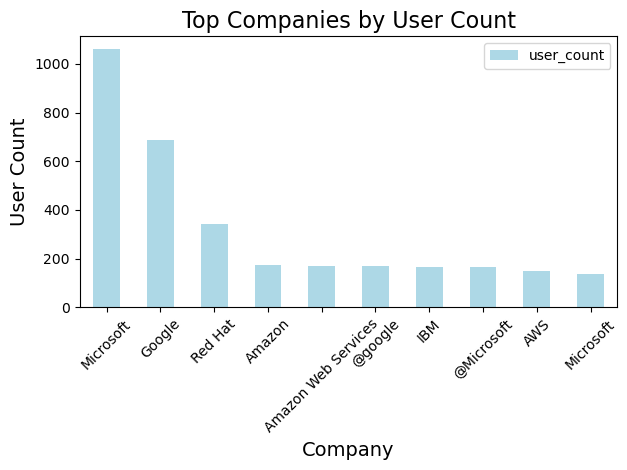

In [6]:
# 统计每个公司在各个地区的用户数量  
location_company_df = data.groupby(['country', 'company']).size().reset_index(name='user_count')  

# 找出公司集中度高的地区  
top_companies = location_company_df.sort_values('user_count', ascending=False).head(10)  
print(top_companies)  

# 可视化  
plt.figure(figsize=(10, 8))  
top_companies.plot(kind='bar', x='company', y='user_count', color='lightblue')  
plt.title('Top Companies by User Count', fontsize=16)  
plt.xlabel('Company', fontsize=14)  
plt.ylabel('User Count', fontsize=14)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Twitter active users: 38931 (16.93%)


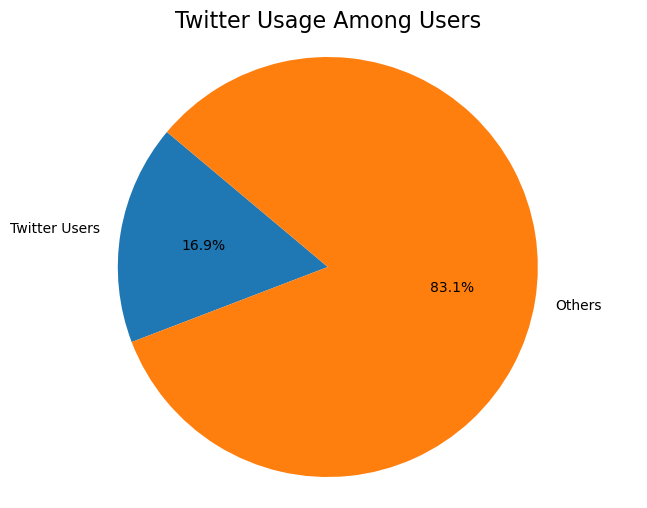

In [7]:
# 统计 Twitter 活跃用户数量  
twitter_active_users = data['twitter_username'].notnull().sum()  
total_users = data.shape[0]  
twitter_usage_percentage = (twitter_active_users / total_users) * 100  

print(f'Twitter active users: {twitter_active_users} ({twitter_usage_percentage:.2f}%)')  

# 可视化 Twitter 用户活跃情况  
plt.figure(figsize=(8, 6))  
labels = ['Twitter Users', 'Others']  
sizes = [twitter_active_users, total_users - twitter_active_users]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  
plt.title('Twitter Usage Among Users', fontsize=16)  
plt.axis('equal')  
plt.show()
